In [39]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans, MiniBatchKMeans
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.feature_extraction import DictVectorizer
import gensim
from sklearn import metrics
from sklearn.datasets import fetch_20newsgroups
from gensim.models import Word2Vec
from gensim.models import  doc2vec
import nltk
import re
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib
from sklearn import random_projection
import numpy as np
from gensim.models.doc2vec import LabeledSentence,TaggedDocument
from textblob import TextBlob
import seaborn


In [40]:
cats_comp=['comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x']

In [41]:
 cats_sport=['rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',]

In [42]:
cats_pol=[ 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc']

In [43]:
dataset = fetch_20newsgroups(subset='train', shuffle=True, random_state=42,remove = ('headers', 'footers', 'quotes') , categories=cats_comp)

In [44]:
targets, frequency = np.unique(dataset.target, return_counts=True)
targets_str = np.array(dataset.target_names)

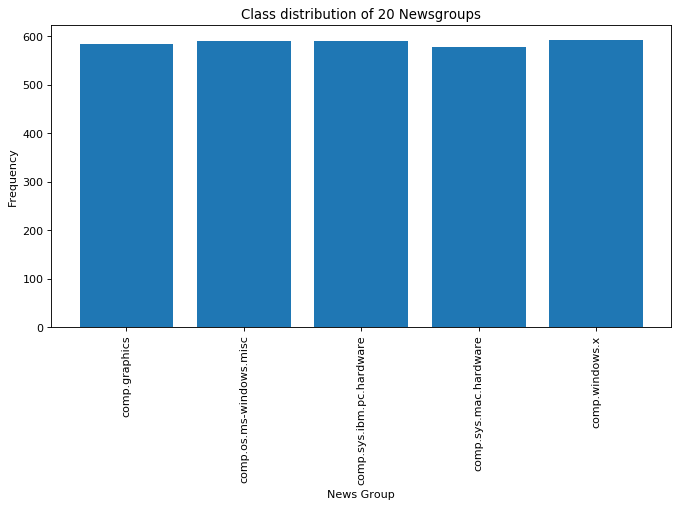

In [45]:
# Training data class distribution
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(targets_str,frequency)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups')
plt.xlabel('News Group')
plt.ylabel('Frequency')
plt.show()

In [46]:
def preprocess(document):

    document = re.sub(r'\W', ' ', str(dataset.data))
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    #remove numbers
    document = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", document)
    
    #spelling Correction
    #document=TextBlob.correct(document)

In [47]:
input_data=preprocess(dataset.data)

In [65]:
#BOW
vectorizer = CountVectorizer(max_df=0.6,lowercase=1, ngram_range =(1,3) ,stop_words='english')
BOW = vectorizer.fit_transform(dataset.data)

In [25]:
#TF_IFD
tfidfvectorizer = TfidfVectorizer(analyzer='word',lowercase=1,stop_words= 'english')
TF_IFD=tfidfvectorizer.fit_transform(input_data)

In [36]:
#TF_IFD+Ngram
tfidfvectorizer = TfidfVectorizer(analyzer='word',lowercase=1,ngram_range =(1,3) ,stop_words= 'english')
TF_Ngram=tfidfvectorizer.fit_transform(input_data)

In [ ]:
#Random word projections
vec = DictVectorizer()
transformer = random_projection.SparseRandomProjection()
RWP=transformer.fit_transform(X)

In [28]:
#COW
model = Word2Vec(input_data, min_count=1, sg=0)
 # get vector data
COW = model[model.wv.vocab]

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [30]:
#Skip gram
model = Word2Vec(input_data, min_count=1, sg=1)
# get vector data
skip_gram = model[model.wv.vocab]

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [32]:
#doc_to_vec
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(input_data)]
model1 = gensim.models.Doc2Vec(documents, size=5, window=2, min_count=1, workers=4)
DTV=model1[model1.wv.vocab]

C:\Users\lenovo\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:319: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [ ]:
#fast_text
from gensim.models.fasttext import FastText
embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2
ft_model =FastText(dataset.data,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)
Fast_Text= ft_model[ft_model.wv.vocab]

In [ ]:
#pre-trained word embeddings
embeddings_index = dict()
f = open('glove.6B/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
embedding_matrix = np.zeros((vocabulary_size, 100))
for word, index in tokenizer.word_index.items():
    if index > vocabulary_size - 1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [74]:
#nclustering
km = KMeans(n_clusters=8, init='k-means++', max_iter=100, n_init=1, verbose=0)
km.fit(BOW)
labels = km.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.9311456980802241